Jackson, Darshil, Talia, and Ahmad World Happiness 2021 Data stuff!

3. World Happiness Report 2021

● What does happiness index look like across the
world?
\
● What affects happiness index? \
● Can you group countries based on features such
as economic production, social support, life
expectancy etc? \
● What impact did COVID-19 have on this index? \
\
More info here: https://worldhappiness.report/ed/2021/



In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from ipywidgets import interact
import ipywidgets as widgets



#This is so that you don't see a bunch of code 'warnings' (things that you could change but don't have to right now)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

#This makes all of our graphs show up in our notebook when they're made
%matplotlib inline

In [136]:
wh2021 = pd.read_csv('data/world-happiness-report-2021.csv')
wh2021.sample(10)


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
94,Ghana,Sub-Saharan Africa,5.088,0.067,5.219,4.958,8.580,0.727,57.586,0.807,0.123,0.848,2.43,0.680,0.595,0.287,0.517,0.268,0.058,2.684
129,Swaziland,Sub-Saharan Africa,4.308,0.071,4.448,4.168,9.065,0.770,50.833,0.647,-0.185,0.708,2.43,0.849,0.693,0.074,0.323,0.067,0.147,2.155
47,Serbia,Central and Eastern Europe,6.078,0.053,6.181,5.974,9.787,0.873,68.600,0.778,0.002,0.835,2.43,1.101,0.924,0.634,0.482,0.189,0.066,2.682
95,Niger,Sub-Saharan Africa,5.074,0.102,5.273,4.875,7.098,0.641,53.780,0.806,0.018,0.693,2.43,0.162,0.402,0.167,0.516,0.200,0.157,3.470
51,Colombia,Latin America and Caribbean,6.012,0.061,6.132,5.892,9.557,0.847,68.001,0.837,-0.135,0.841,2.43,1.021,0.866,0.615,0.554,0.100,0.063,2.794
100,Bangladesh,South Asia,5.025,0.046,5.115,4.934,8.454,0.693,64.800,0.877,-0.041,0.682,2.43,0.635,0.520,0.514,0.603,0.161,0.164,2.427
45,Romania,Central and Eastern Europe,6.140,0.057,6.253,6.027,10.284,0.832,67.355,0.845,-0.219,0.938,2.43,1.275,0.832,0.595,0.564,0.045,0.001,2.830
124,Palestinian Territories,Middle East and North Africa,4.517,0.067,4.649,4.384,8.485,0.826,62.250,0.653,-0.163,0.821,2.43,0.646,0.819,0.434,0.330,0.082,0.075,2.131
133,Mauritania,Sub-Saharan Africa,4.227,0.070,4.365,4.090,8.542,0.795,57.161,0.561,-0.106,0.731,2.43,0.666,0.749,0.273,0.218,0.119,0.133,2.069


In [137]:
wh = pd.read_csv('data/world-happiness-report.csv')
wh.sample(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1080,Malta,2013,6.380,10.422,0.942,71.96,0.909,0.410,NaN,0.660,0.370
715,Hungary,2012,4.683,10.117,0.906,65.92,0.569,-0.136,0.930,0.652,0.315
1665,Syria,2011,4.038,8.727,0.576,62.32,0.530,0.131,0.741,0.599,0.496
773,Iran,2020,4.865,NaN,0.757,66.60,0.600,NaN,0.710,0.582,0.470
668,Guinea,2015,3.505,7.645,0.579,51.10,0.666,0.007,0.762,0.667,0.268
1529,Singapore,2015,6.620,11.400,0.866,75.90,0.887,0.150,0.099,0.803,0.142
1588,South Korea,2013,5.959,10.520,0.797,72.18,0.642,-0.050,0.832,0.676,0.189
1506,Serbia,2018,5.936,9.762,0.853,68.20,0.740,-0.100,0.864,0.559,0.296
1609,Spain,2015,6.381,10.531,0.956,73.50,0.732,-0.072,0.822,0.732,0.285
1685,Tajikistan,2009,4.575,7.682,0.676,61.96,0.744,0.001,0.792,0.605,0.203


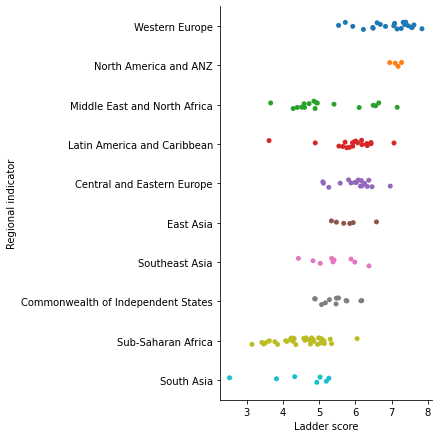

In [138]:
happy_by_country = sns.catplot(
    data=wh2021,
    y='Regional indicator', x="Ladder score",
    ci=None, orient='h', height=6
)

In [139]:
#Jackson's Section Start

In [140]:
wh2021_j = wh2021.drop(columns=['Regional indicator', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual'])
wh2021_j['year'] = 2021
wh2021_j = wh2021_j[wh2021_j['Country name'].isin(wh[wh['year']==2020]['Country name'].unique())]
wh2021_j = wh2021_j.rename(columns={'Ladder score': 'Life Ladder', 'Logged GDP per capita': 'Log GDP per capita', 'Healthy life expectancy': 'Healthy life expectancy at birth'})
wh_j = wh.drop(columns=['Positive affect', 'Negative affect'])
wh_j = wh_j[wh_j['Country name'].isin(wh2021_j['Country name'].unique())]
wh_j=wh_j.append(wh2021_j) #Add a 2021 statistic for all the countries to help get data on pre-rona v post-rona

In [141]:
wh_j[wh_j['Country name'] == 'United States']

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
1836,United States,2006,7.182,10.924,0.965,68.06,0.911,NaN,0.600
1837,United States,2007,7.513,10.933,NaN,68.22,0.872,0.197,0.633
1838,United States,2008,7.280,10.922,0.953,68.38,0.878,0.255,0.668
1839,United States,2009,7.158,10.888,0.912,68.54,0.831,0.201,0.665
1840,United States,2010,7.164,10.905,0.926,68.70,0.828,0.244,0.690
1841,United States,2011,7.115,10.913,0.922,68.68,0.863,0.161,0.697
1842,United States,2012,7.026,10.928,0.903,68.66,0.823,0.215,0.710
1843,United States,2013,7.249,10.939,0.925,68.64,0.792,0.274,0.747
1844,United States,2014,7.151,10.956,0.902,68.62,0.866,0.221,0.702
1845,United States,2015,6.864,10.977,0.904,68.60,0.849,0.219,0.698


In [142]:
def countrySelector(country):
    return sns.scatterplot(data=wh_j[wh_j['Country name'] == country], x='year', y='Life Ladder')

interact(countrySelector, country='United States'); #widget to see various countries Ladder score's over years

interactive(children=(Text(value='United States', description='country'), Output()), _dom_classes=('widget-int…

In [143]:
wh_j_sorted=wh_j.sort_values(by='Country name')
rona_diff = []
summ = 0
for i in range(len(list(wh_j_sorted[wh_j_sorted['year']==2020]['Life Ladder']))):
        rona_diff.append((list(wh_j_sorted[wh_j_sorted['year']==2020]['Life Ladder'])[i] - list(wh_j_sorted[wh_j_sorted['year']==2021]['Life Ladder'])[i]) * -1)
        summ+= rona_diff[i]
average_rona_diff = summ/len(wh_j_sorted[wh_j_sorted['year']==2020])
print('On average, the world\'s happiness changed by', average_rona_diff, 'Life Ladder score after the pandemic started')
differ = pd.DataFrame()
differ['Country name'] = wh_j_sorted[wh_j_sorted['year']==2020]['Country name']
differ['rona_diff'] = rona_diff
differ.reset_index(drop=True)
differ.sort_values(by='rona_diff').head(10) #countries made most unhappy by rona age

On average, the world's happiness changed by -0.001473684210526275 Life Ladder score after the pandemic started


,Country name,rona_diff
1933,Zambia,-0.765
1279,Nigeria,-0.744
422,Croatia,-0.626
944,Kyrgyzstan,-0.506
356,China,-0.432
746,India,-0.406
1807,Ukraine,-0.395
1150,Mongolia,-0.334
244,Bulgaria,-0.332
550,Ethiopia,-0.274


In [144]:
differ.sort_values(by='rona_diff', ascending=False).head(10) #countries that gained happiness from rona era

,Country name,rona_diff
1394,Philippines,0.800
174,Benin,0.637
527,El Salvador,0.599
117,Bahrain,0.474
277,Cambodia,0.453
1087,Malta,0.445
497,Ecuador,0.410
482,Dominican Republic,0.377
1122,Mexico,0.353
1893,Venezuela,0.318


In [145]:
#can these be explained by the coronavirus impact in these countries
le_rona = pd.read_csv('data/owid-covid-data.csv')
le_rona = le_rona[le_rona['continent'].notna()]
le_rona = le_rona[le_rona['date']=='7/12/2021'][['location', 'total_cases', 'total_deaths']]
le_rona = le_rona.reset_index(drop=True)
le_rona['deaths per case'] = le_rona['total_deaths'] / le_rona['total_cases']
le_rona = le_rona[le_rona['location'].isin(differ['Country name'])]
le_rona = le_rona.rename(columns={'location': 'Country name'})
rona_differ = pd.merge(differ, le_rona, on='Country name')

In [146]:
px.scatter(rona_differ, y='rona_diff', x='deaths per case', color='total_deaths', opacity=1,
           title = 'Impact of the Coronavirus on a Country\'s Happiness',
           labels={'deaths per case':'Deaths per Case', 'total_deaths':'Total Deaths', 'rona_diff': 'Happiness Change After Pandemic'}, hover_name='Country name')

NameError: name 'px' is not defined

In [147]:
px.scatter(rona_differ, y='rona_diff', x='total_deaths', color='deaths per case', opacity=1,
           title = 'Impact of the Coronavirus on a Country\'s Happiness',
           labels={'deaths per case':'Deaths per Case', 'total_deaths':'Total Deaths', 'rona_diff': 'Happiness Change After Pandemic'}, hover_name='Country name')

NameError: name 'px' is not defined

In [148]:
#Still need to style and add some markdown to make the narrative clear

In [149]:
#Jackson's Section End 

In [150]:
#Ahmad's section

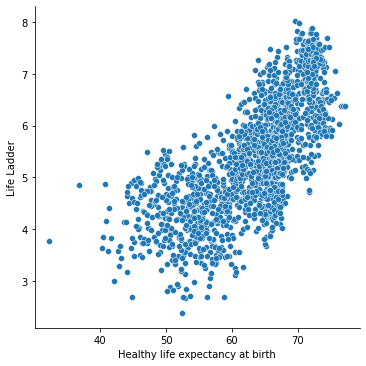

In [154]:
ax = sns.relplot(x="Healthy life expectancy at birth", y="Life Ladder", data=wh,  kind="scatter")

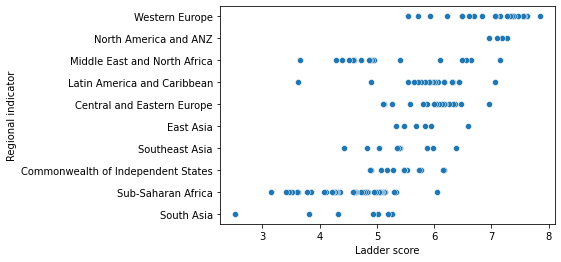

In [56]:
fg = sns.scatterplot(x="Ladder score", y="Regional indicator", data=wh2021,
            )

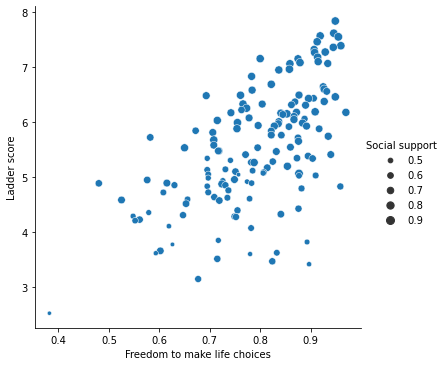

In [57]:
fg = sns.relplot(x="Freedom to make life choices", y="Ladder score", data=wh2021, kind="scatter", size="Social support")

[(0.0, 10.0)]

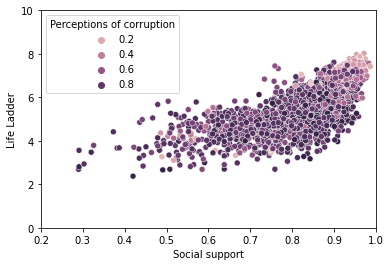

In [126]:
SN= sns.scatterplot("Social support", "Life Ladder", hue="Perceptions of corruption", data=wh)
SN. set(xlim=(0.2,1))
SN. set(ylim=(0, 10))

In [59]:
wh.loc[wh['Life Ladder'] == 2.3750000]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
11,Afghanistan,2019,2.375,7.697,0.42,52.4,0.394,-0.108,0.924,0.351,0.502


In [60]:
wh.loc[wh['Life Ladder'] == 8.019000]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
449,Denmark,2005,8.019,10.851,0.972,69.6,0.971,NaN,0.237,0.86,0.154


<AxesSubplot:>

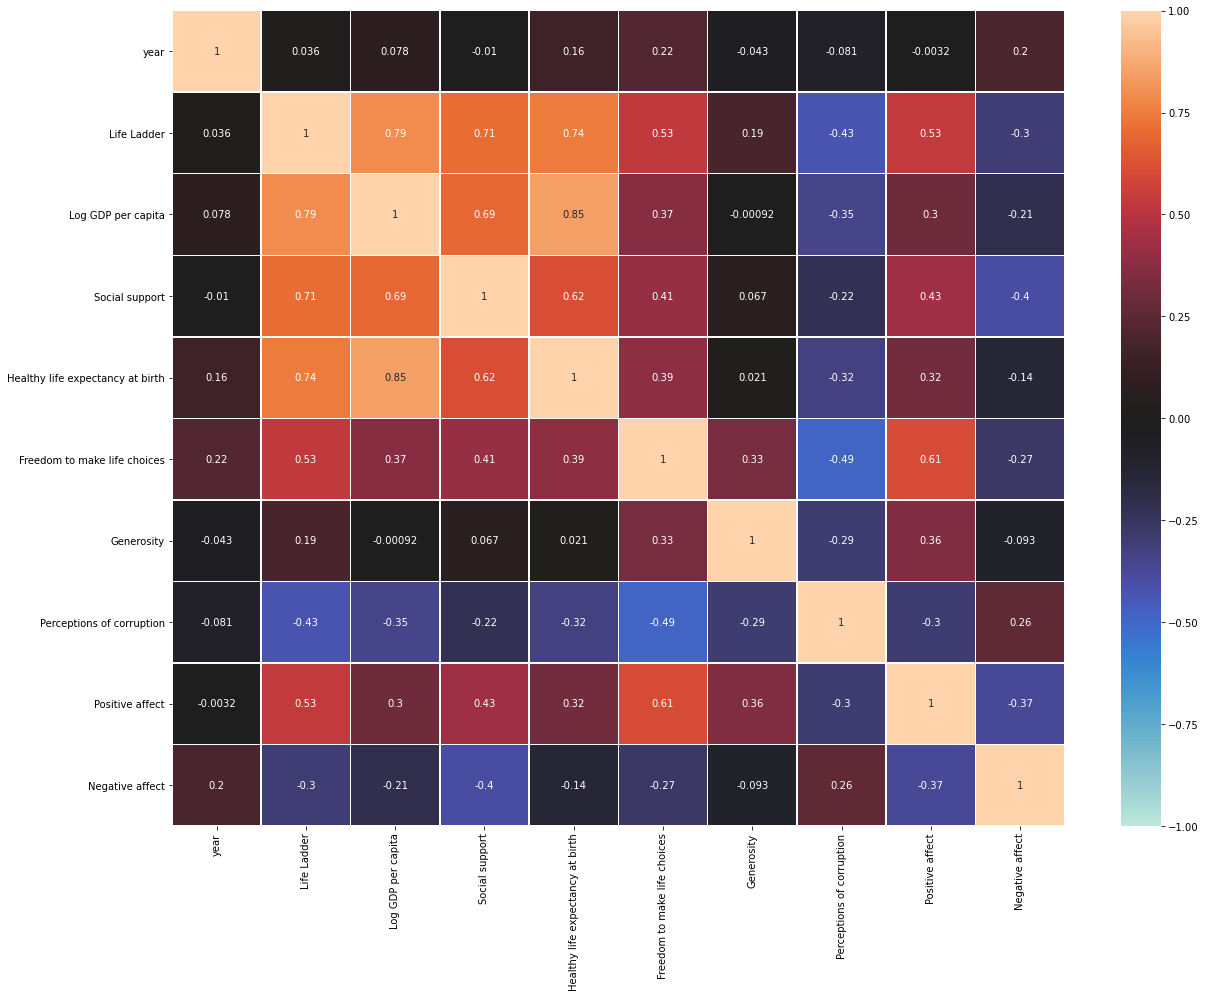

In [61]:
corr = wh.corr()
fig, ax = plt.subplots(figsize=(20,15)) # 
sns.heatmap(corr, 
            annot=True, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            ax=ax, 
            linewidths=.5, 
            vmin = -1, vmax=1, center=0
           )

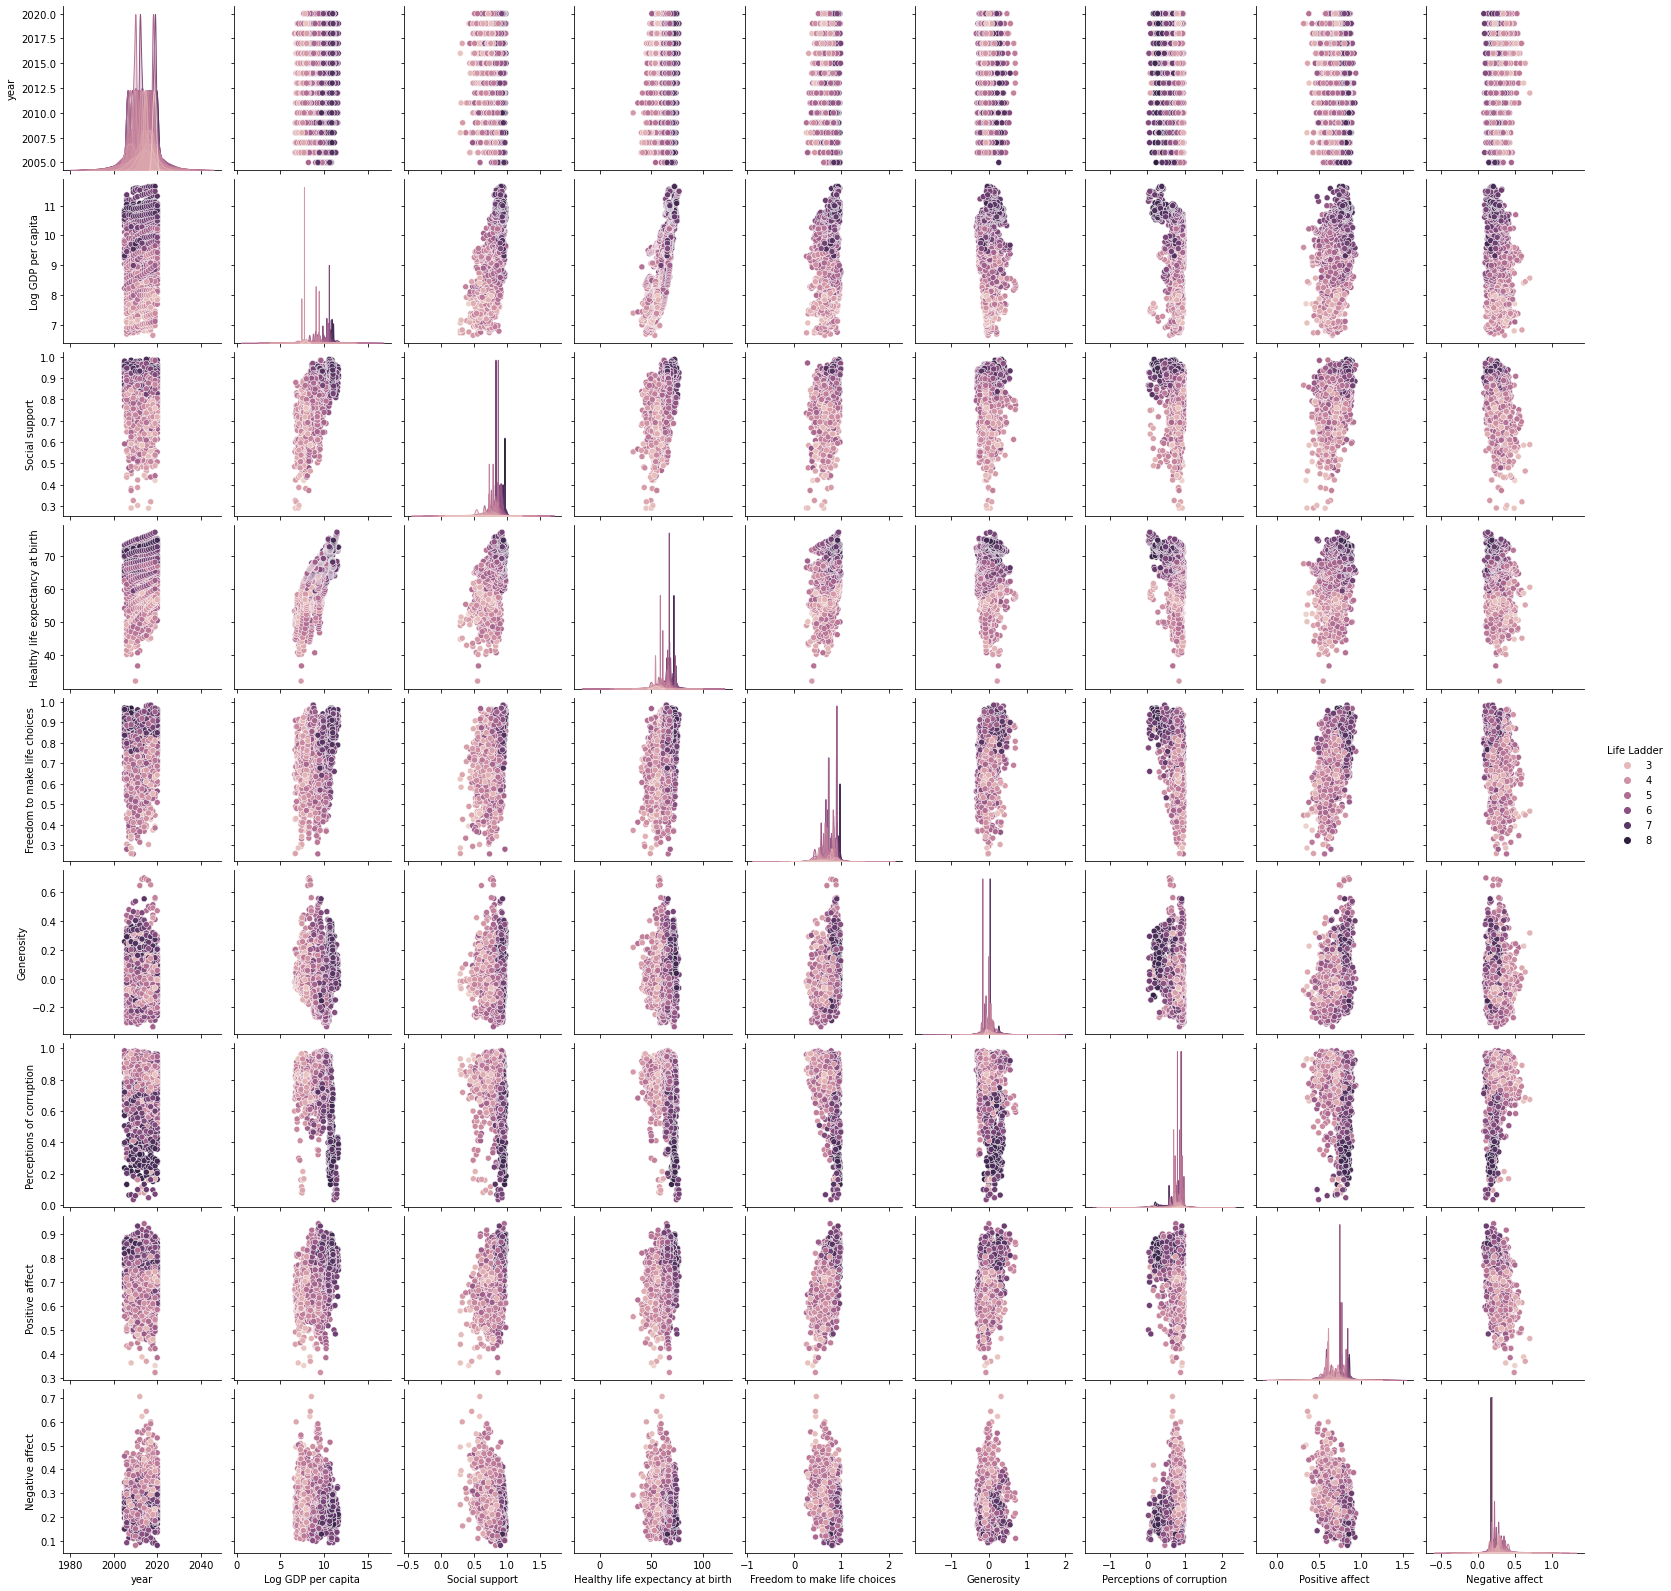

In [103]:
sns.pairplot(wh, hue="Life Ladder")

In [80]:
whWE = wh2021[wh2021['Regional indicator'] == 'Western Europe'] = 6.914905
whNA = wh2021[wh2021['Regional indicator'] == 'North America and ANZ'] = 7.128500
whME = wh2021[wh2021['Regional indicator'] == 'Middle East and North Africa'] = 5.219765
whLA = wh2021[wh2021['Regional indicator'] == 'Latin America and Caribbean'] = 5.908050
whCE = wh2021[wh2021['Regional indicator'] == 'Central and Eastern Europe'] = 5.984765
whEA = wh2021[wh2021['Regional indicator'] == 'East Asia'] = 5.810333
whSE = wh2021[wh2021['Regional indicator'] == 'Southeast Asia'] = 5.407556
whCI = wh2021[wh2021['Regional indicator'] == 'Commonwealth of Independent States'] = 5.467000
whSS = wh2021[wh2021['Regional indicator'] == 'Sub-Saharan Africa'] = 4.494472
whSA = wh2021[wh2021['Regional indicator'] == 'South Asia'] = 4.441857


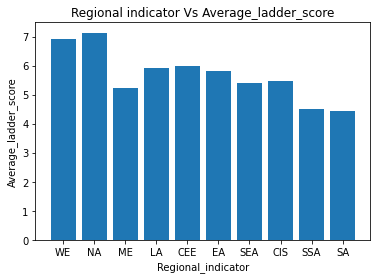

In [130]:
Regional_indicator = ['WE','NA', 'ME', 'LA', 'CEE', 'EA', 'SEA' , 'CIS' , 'SSA' , 'SA']

Average_ladder_score = [6.914905, 7.128500, 5.219765, 5.908050, 5.984765, 5.810333, 5.407556, 5.467000, 4.494472, 4.441857]


plt.bar(Regional_indicator, Average_ladder_score)
plt.title('Regional indicator Vs Average_ladder_score')
plt.xlabel('Regional_indicator')
plt.ylabel('Average_ladder_score')
plt.show()